<a href="https://colab.research.google.com/github/Exion007/Colab/blob/main/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

* Ensemble learning is a supervised machine learning technique that aims to improve the accuracy of the prediction.

* Ensemble methods combine predictions from multiple models.

* Ensemble methods are meta-algorithms that associate a variety of machine learning methods into a single predictive model to decrease variance by means of bagging, decrease bias by means of boosting, or improve predictions by means of stacking.

* We can classify ensemble methods into two main branches:
  1. <u>Simple Ensemble Methods</u>

  2. <u>Advanced Ensemble Methods</u>

# 1. Simple Ensemble Methods

* **Voting**
  - Primarily used in classification problems.
  - Combine the predictions obtained from multiple models to come up with a final prediction.
  - Example: Elections (50% + 1)

* **Averaging**
  - Primarily used in classification problems.
  - Similar to **'Voting'**, but it involves calculating the average of predicted probabilities.
  - Ex: (0.6 + 0.7 + 0.8) / 3 = 0.7

* **Weighted Averaging**
  - Similar to **'Averaging'**, but each model's prediction is given a weight based on its reliability or performance.
  - Ex: [(0.6 * 0.1) + (0.7 * 0.3) + (0.8 * 0.6)] = 0.75


# 2. Advanced Ensemble Methods

  * **Bagging (Bootstrap Aggregating)**
    - Used in classification or regression problems
    - Multiple instances of the same model are trained on different subsets of the training data, each obtained through bootstrap resampling.
    - The final prediction is often an average or majority vote of predictions from each individual model.
    
    - <u>Advantages:</u>
      * Reduced variance
      * Mitigates overfitting
      * Ensemble models created through bagging often generalize better to unseen data than individual models
      * The base models in bagging can be trained in parallel

    - <u>Disadvantages:</u>
      * Limited model interpretability
      * Computationally expensive
      * Bias might be introduced as a result of random sampling

        <div>
        <img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" width="500"/>
        </div>
  
  ---

  * **Random Forest**
    - Used in classification or regression problems
    - A specific type of bagging where an ensemble of decision trees is created.
    - Each tree is trained on a different bootstrap sample, and during tree construction, a random subset of features is considered at each split.
    - Predictions are aggregated through majority voting (classification) or averaging (regression) of tree predictions.

        <div>
        <img src="https://pages.cms.hu-berlin.de/EOL/geo_rs/fig/s09_rf-concept.png" width="400"/>
        </div>
  
---

 * **Boosting**
  - Used in classification or regression problems
  - Iterative process where models are trained sequentially, with each new model focusing on the mistakes made by the previous models.

  - The final prediction is an aggregate of the predictions from all models, weighted according to their performance.
  - <u>There are 4 commonly used boosting algorithms:</u>
  
    1. **Gradient Boosting:**
        - GB builds a sequence of models in a way that each new model attempts to correct the errors made by the previous models. It uses gradient descent optimization to minimize a loss function.

        - The final prediction is the sum of predictions from all models, where each model's contribution is determined by a learning rate.
      
    2. **AdaBoost (Adaptive Boosting):**

        - AdaBoost assigns higher weights to misclassified samples and lower weights to correctly classified samples. It trains a sequence of models, where each new model gives more importance to the misclassified samples from the previous models.

        - The final prediction is a weighted combination of the predictions from all models.
      
    3. **XGBoost (Extreme Gradient Boosting):**
        - XGBoost is an advanced version of gradient boosting that incorporates regularization, parallel processing, and handling of missing values. It also optimizes the performance of each individual tree in the ensemble.
        
        - It has become a widely used algorithm in various machine learning competitions and applications due to its high performance and scalability. Additionally, it is said that XGBoost is the fastest and amongst all boosting algorithms.
      
    4. **CatBoost:**
      - CatBoost is a gradient boosting algorithm that handles categorical features directly, eliminating the need for preprocessing like label encoding or one-hot encoding.

      - It also employs techniques like ordered boosting and oblivious trees to improve performance and generalization.

  - <u>Advantages:</u>
    * Improved accuracy
    * Robustness to overfitting
    * Better handling of imbalanced data
    * Better interpretability

  - <u>Disadvantages:</u>
    * Vulnerable to the outliers
    * Difficult to use for the Real-Time applications
    * Computationally expensive for large datasets

        <div>
        <img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" width="500"/>
        </div>

  ---

* **Stacking**
  - Stacking involves training multiple individual models (also called base models) and then combining their predictions using a meta-model.

  - <u>Steps:</u>

    1 - Train severeal diverse base models on the     
    training data.
    
      2 - For each base model, generate predictions on both the training and test data.

      3 -  Create a new dataset using the predictions from the base models as features. This new dataset is used to train a meta-model.

      4 - Use the trained meta-model to make predictions on new, unseen data.
  
  - <u>Advantages:</u>
    * Can capture complex relationships between base models and exploit their strengths.
    * Generally provides better performance than individual models.
    * Can adapt to different data patterns.

  - <u>Disadvantages:</u>
    * More complex and computationally intensive than other methods.
    * Prone to overfitting, especially if not carefully tuned.
    * Requires a larger amount of data to be effective.

        <div>
        <img src="https://www.scaler.com/topics/images/blending-in-machine-learning-3.webp" width="600"/>
        </div>

  ---

* **Blending**
  - Blending follows a similar idea to **Stacking**, but it usually involves splitting the training data into two parts: a part for training base models and another part for training a meta-model.
  
  - <u>Steps:</u>

    1 -  Train several base models on one part of the training data.
    
      2 - Generate predictions on the other part of the training data using the trained base models.

      3 -  Train a meta-model using the predictions from the base models as features.

      4 - Use the trained meta-model to make predictions on the test data.
  
  - <u>Advantages:</u>
    * Simpler and faster to implement than full stacking.
    * Less prone to overfitting compared to stacking.
    * Can provide a performance boost over individual models.

  - <u>Disadvantages:</u>
    * May not capture complex interactions between base models as effectively as stacking.
    * Requires careful data partitioning to ensure proper training and validation sets.

        <div>
        <img src="https://www.scaler.com/topics/images/blending-in-machine-learning-1.webp" width="600"/>
        </div>

# Sample Training

In [102]:
import time
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import mean_squared_error, recall_score, precision_score

In [103]:
# Reading filed

df = pd.read_csv("movies.csv")
df.head(3)

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN


In [104]:
# PREPROCESSING

# Selecting the columns we want to use
df = df.loc[:, ['vote_average', 'vote_count', 'genres', 'budget', 'popularity']]


# Replace the budget values given as 0 with the mean of the other budget values
avg = df.query("budget > 0").budget.mean()
df.loc[df["budget"] == 0, "budget"] = avg

# Drop NA values (We do not have any in this case)
df.dropna(inplace = True)

# Convert the genres column from string to list format
def convert_genres(row):
  row = row[1:-1].replace("'", "").split(", ")
  return row

df['genres'] = df['genres'].apply(convert_genres)

df.head(3)

,vote_average,vote_count,genres,budget,popularity
0,7.4,619,"[Horror, Mystery, Thriller]",18000000.0,5089.969
1,6.6,2294,"[Action, Adventure, Science Fiction]",200000000.0,4665.438
2,7.5,1861,"[Animation, Adventure, Family, Fantasy, Comedy]",100000000.0,3935.550


In [105]:
# Selecting the columns we want to operate on
X = df[['vote_count', 'genres', 'budget', 'popularity']]
y = df['vote_average']

# One hot encoding
mlb = MultiLabelBinarizer()

# Transform the genres column into binary columns
genres_encoded = pd.DataFrame(mlb.fit_transform(X['genres']), columns=mlb.classes_, index=X.index)

# Concatenate the encoded genres with the original features
X_encoded = pd.concat([X[['vote_count', 'budget', 'popularity']], genres_encoded], axis=1)

# Displaying Genres
genres = X_encoded.iloc[:, 4:].columns
print(genres)

X_encoded.head(3)

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')


,vote_count,budget,popularity,,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,619,18000000.0,5089.969,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,2294,200000000.0,4665.438,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1861,100000000.0,3935.550,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Dataframe to keep the performance data

algs = []
mses = []
rmses = []
precisions = []
recalls = []
exectimes = []
predictions = []

def addrow(alg, mse, precision, recall, exec_time, prediction):
  algs.append(alg)
  mses.append(mse)
  rmses.append(mse ** 0.5)
  precisions.append(precision)
  recalls.append(recall)
  exectimes.append(exec_time)
  predictions.append(prediction)

In [107]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [108]:
# Using Random Forest

start_time = time.time()

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_rf = [1 if pred >= threshold else 0 for pred in y_pred_rf]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_rf = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_rf = precision_score(y_test_binary_rf, y_pred_binary_rf)
recall_rf = recall_score(y_test_binary_rf, y_pred_binary_rf)

end_time = time.time()
exec_rf = end_time - start_time

print(f"Random Forest Regressor -> Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor -> Root Mean Squared Error: {mse_rf ** 0.5}")
print(f"Random Forest Regressor -> Precision: {precision_rf}")
print(f"Random Forest Regressor -> Recall: {recall_rf}")
print(f"Elapsed Time: {exec_rf:.2f} seconds")

Random Forest Regressor -> Mean Squared Error: 0.6400700505
Random Forest Regressor -> Root Mean Squared Error: 0.8000437803645498
Random Forest Regressor -> Precision: 0.7046511627906977
Random Forest Regressor -> Recall: 0.45089285714285715
Elapsed Time: 4.18 seconds


In [109]:
# Using Gradient Boosting

start_time = time.time()

model_gb = GradientBoostingRegressor()

model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_gb = [1 if pred >= threshold else 0 for pred in y_pred_gb]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_gb = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_gb = precision_score(y_test_binary_gb, y_pred_binary_gb)
recall_gb = recall_score(y_test_binary_gb, y_pred_binary_gb)

end_time = time.time()
exec_gb = end_time - start_time

print(f"Gradient Boosting Regressor -> Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regressor -> Root Mean Squared Error: {mse_gb ** 0.5}")
print(f"Gradient Boosting Regressor -> Precision: {precision_gb}")
print(f"Gradient Boosting Regressor -> Recall: {recall_gb}")
print(f"Elapsed Time: {exec_gb:.2f} seconds")

Gradient Boosting Regressor -> Mean Squared Error: 0.6098126245278027
Gradient Boosting Regressor -> Root Mean Squared Error: 0.7809050035233497
Gradient Boosting Regressor -> Precision: 0.7539432176656151
Gradient Boosting Regressor -> Recall: 0.3556547619047619
Elapsed Time: 1.09 seconds


In [110]:
# Using XGBoost

start_time = time.time()

model_xgb = XGBRegressor()

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_xgb = [1 if pred >= threshold else 0 for pred in y_pred_xgb]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_xgb = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_xgb = precision_score(y_test_binary_xgb, y_pred_binary_xgb)
recall_xgb = recall_score(y_test_binary_xgb, y_pred_binary_xgb)

end_time = time.time()
exec_xgb = end_time - start_time

print(f"XGBoost -> Mean Squared Error: {mse_xgb}")
print(f"XGBoost -> Root Mean Squared Error: {mse_xgb ** 0.5}")
print(f"XGBoost -> Precision: {precision_xgb}")
print(f"XGBoost -> Recall: {recall_xgb}")
print(f"Elapsed Time: {exec_xgb:.2f} seconds")

XGBoost -> Mean Squared Error: 0.6134430232279932
XGBoost -> Root Mean Squared Error: 0.7832260358466087
XGBoost -> Precision: 0.713953488372093
XGBoost -> Recall: 0.4568452380952381
Elapsed Time: 1.12 seconds


In [111]:
# Using AdaBoost

start_time = time.time()

model_adaboost = AdaBoostRegressor()

model_adaboost.fit(X_train, y_train)

y_pred_ada = model_adaboost.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)

# Convert predicted vote averages into binary classifications
threshold = 7.0  # Choose an appropriate threshold based on your problem
y_pred_binary_ada = [1 if pred >= threshold else 0 for pred in y_pred_ada]

# Convert actual vote averages into binary classifications using the same threshold
y_test_binary_ada = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate recall and precision
precision_ada = precision_score(y_test_binary_ada, y_pred_binary_ada)
recall_ada = recall_score(y_test_binary_ada, y_pred_binary_ada)

end_time = time.time()
exec_ada = end_time - start_time

print(f"AdaBoost Regressor -> Mean Squared Error: {mse_ada}")
print(f"AdaBoost Regressor -> Root Mean Squared Error: {mse_ada ** 0.5}")
print(f"AdaBoost Regressor -> Precision: {precision_ada}")
print(f"AdaBoost Regressor -> Recall: {recall_ada}")
print(f"Elapsed Time: {exec_ada:.2f} seconds")

AdaBoost Regressor -> Mean Squared Error: 0.7869751042557721
AdaBoost Regressor -> Root Mean Squared Error: 0.8871161729197434
AdaBoost Regressor -> Precision: 0.6623376623376623
AdaBoost Regressor -> Recall: 0.07589285714285714
Elapsed Time: 0.15 seconds


In [112]:
# Get the input from the user, and display ratings produced using algorithms

# Function to input genres. Get genre input from the user until user inputs "exit"

def input_genres():
  genres = []
  x = True
  while (x):
    genre = str(input("Enter genre: ").lower().capitalize())

    if (genre.lower() == "exit"):
      x = False

    else:
      if genre not in genres:
        genres.append(genre)

  return genres

# Get inputs
new_vote_count = int(input("Enter vote count: "))
new_budget = int(input("Enter budget: "))
new_genres = input_genres()
new_popularity = float(input("Enter popularity: "))

# Example prediction for new data
new_data = pd.DataFrame({
    'vote_count': [new_vote_count],
    'genres': [new_genres],
    'budget': [new_budget],
    'popularity': [new_popularity]
})

# Transform the genres for the new data
new_data_genres_encoded = pd.DataFrame(mlb.transform(new_data['genres']), columns=mlb.classes_, index=new_data.index)

# Concatenate the encoded genres with the new data features
new_data_encoded = pd.concat([new_data[['vote_count', 'budget', 'popularity']], new_data_genres_encoded], axis=1)

print()

# Make prediction for new data
prediction_rf = model_rf.predict(new_data_encoded)
print(f"Random Forest Regressor -> Predicted Vote Average: {prediction_rf[0]:.2f}")

prediction_gb = model_gb.predict(new_data_encoded)
print(f"Gradient Boosting Regressor -> Predicted Vote Average: {prediction_gb[0]:.2f}")

prediction_xgb = model_xgb.predict(new_data_encoded)
print(f"XGBoost Regressor -> Predicted Vote Average: {prediction_xgb[0]:.2f}")

prediction_adaboost = model_adaboost.predict(new_data_encoded)
print(f"AdaBoost Regressor -> Predicted Vote Average: {prediction_adaboost[0]:.2f}")

Enter vote count: 3000
Enter budget: 60000000
Enter genre: action
Enter genre: COMEDY
Enter genre: exit
Enter popularity: 6000

Random Forest Regressor -> Predicted Vote Average: 6.83
Gradient Boosting Regressor -> Predicted Vote Average: 6.97
XGBoost Regressor -> Predicted Vote Average: 7.05
AdaBoost Regressor -> Predicted Vote Average: 6.68


In [113]:
addrow("Random Forest", mse_rf, precision_rf, recall_rf, exec_rf, prediction_rf[0])
addrow("Gradient Boosting", mse_gb, precision_gb, recall_gb, exec_gb, prediction_gb[0])
addrow("XGBoost", mse_xgb, precision_xgb, recall_xgb, exec_xgb, prediction_xgb[0])
addrow("AdaBoost", mse_ada, precision_ada, recall_ada, exec_ada, prediction_adaboost[0])

data = {
    "Algorithm" : algs,
    "MSE" : mses,
    "RMSE" : rmses,
    "Precision" : precisions,
    "Recall" : recalls,
    "Execution Time" : exectimes,
    "Predictions" : predictions
}

infodf = pd.DataFrame(data)
infodf.head()

,Algorithm,MSE,RMSE,Precision,Recall,Execution Time,Predictions
0,Random Forest,0.640070,0.800044,0.704651,0.450893,4.176672,6.827000
1,Gradient Boosting,0.609813,0.780905,0.753943,0.355655,1.085412,6.972763
2,XGBoost,0.613443,0.783226,0.713953,0.456845,1.123767,7.046567
3,AdaBoost,0.786975,0.887116,0.662338,0.075893,0.154658,6.681508


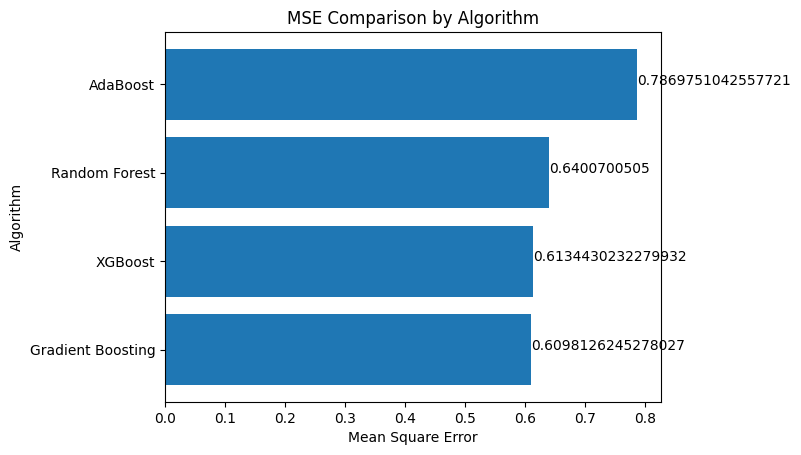

In [114]:
df_sorted = infodf.sort_values(by='MSE')

plt.barh(df_sorted.Algorithm, df_sorted['MSE'])

for index, value in enumerate(df_sorted['MSE']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Mean Square Error')
plt.ylabel('Algorithm')
plt.title('MSE Comparison by Algorithm')
plt.show()

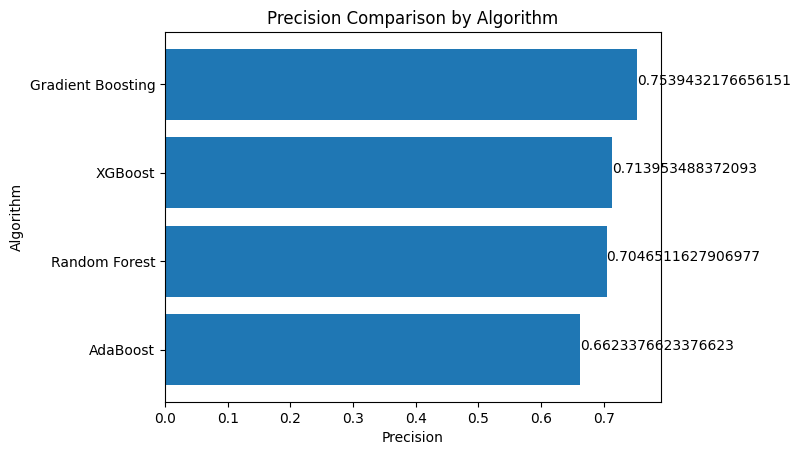

In [115]:
df_sorted = infodf.sort_values(by='Precision')

plt.barh(df_sorted.Algorithm, df_sorted['Precision'])

for index, value in enumerate(df_sorted['Precision']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Precision')
plt.ylabel('Algorithm')
plt.title('Precision Comparison by Algorithm')
plt.show()

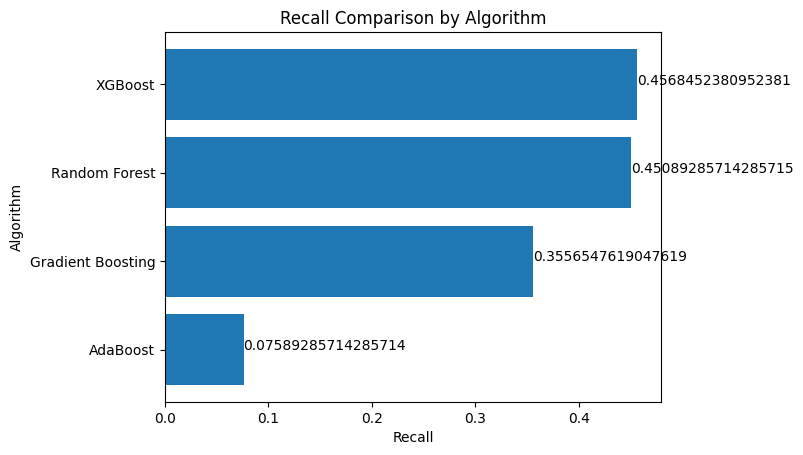

In [116]:
df_sorted = infodf.sort_values(by='Recall')

plt.barh(df_sorted.Algorithm, df_sorted['Recall'])

for index, value in enumerate(df_sorted['Recall']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Recall')
plt.ylabel('Algorithm')
plt.title('Recall Comparison by Algorithm')
plt.show()

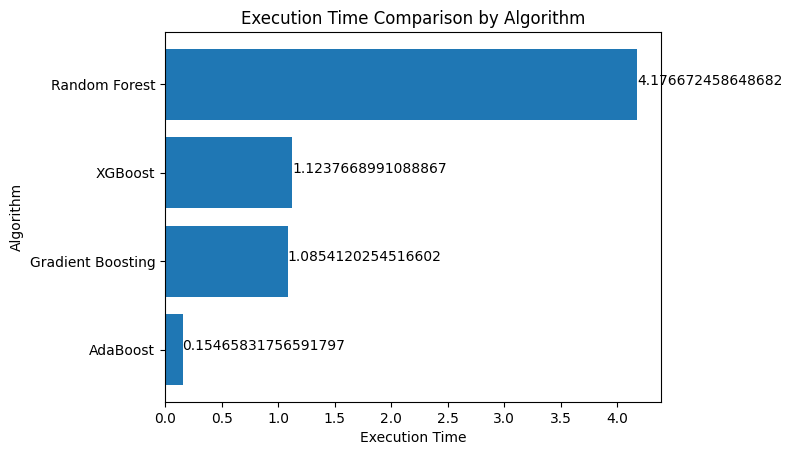

In [117]:
df_sorted = infodf.sort_values(by='Execution Time')

plt.barh(df_sorted.Algorithm, df_sorted['Execution Time'])

for index, value in enumerate(df_sorted['Execution Time']):
    plt.text(value, index, str(value), ha='left')

plt.xlabel('Execution Time')
plt.ylabel('Algorithm')
plt.title('Execution Time Comparison by Algorithm')
plt.show()